Processing dataset: Half Moons (grid_size=0.1, density_threshold=3)


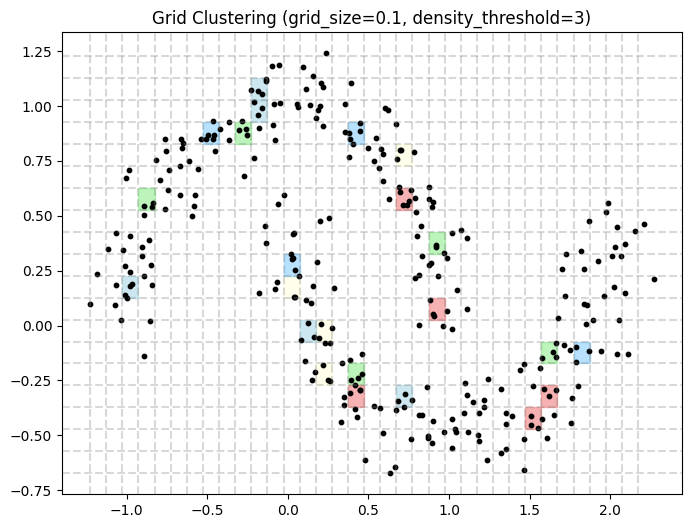

Processing dataset: Half Moons (grid_size=0.1, density_threshold=5)


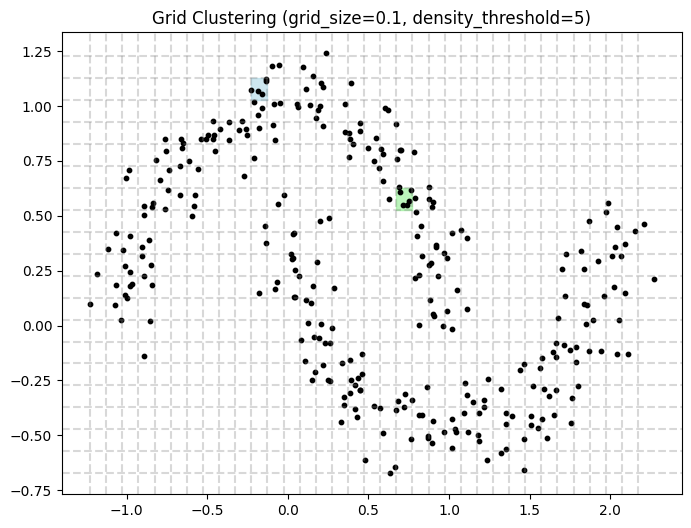

Processing dataset: Half Moons (grid_size=0.1, density_threshold=10)


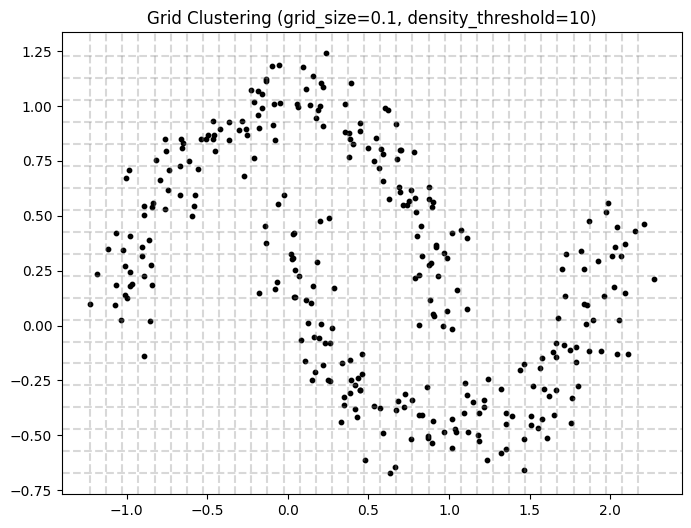

Processing dataset: Half Moons (grid_size=0.2, density_threshold=3)


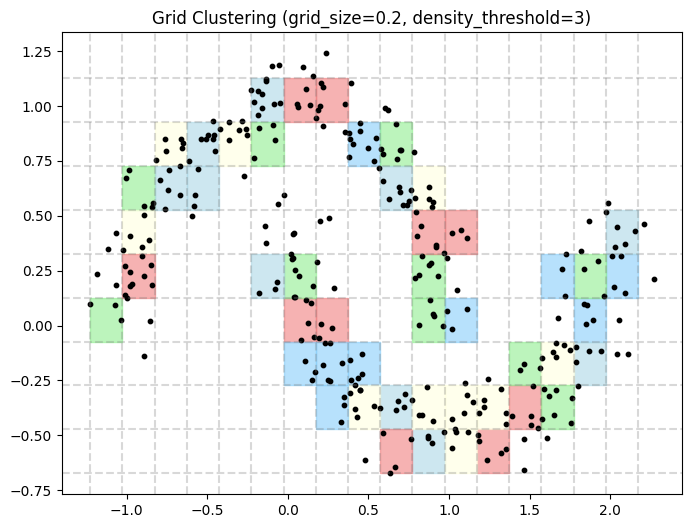

Processing dataset: Half Moons (grid_size=0.2, density_threshold=5)


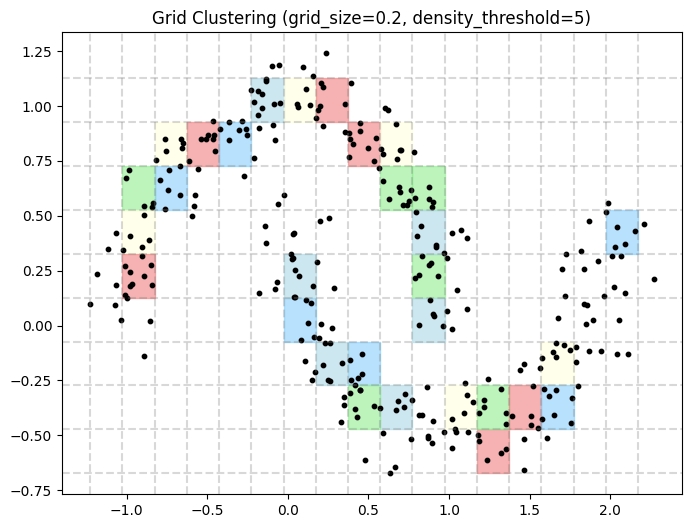

Processing dataset: Half Moons (grid_size=0.2, density_threshold=10)


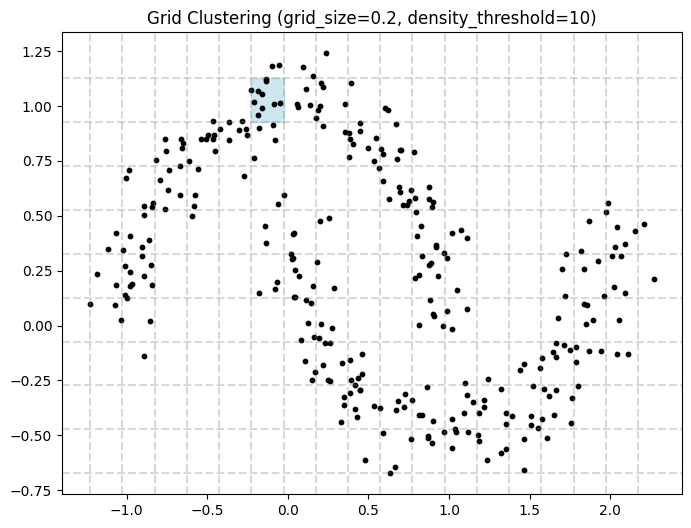

Processing dataset: Half Moons (grid_size=0.5, density_threshold=3)


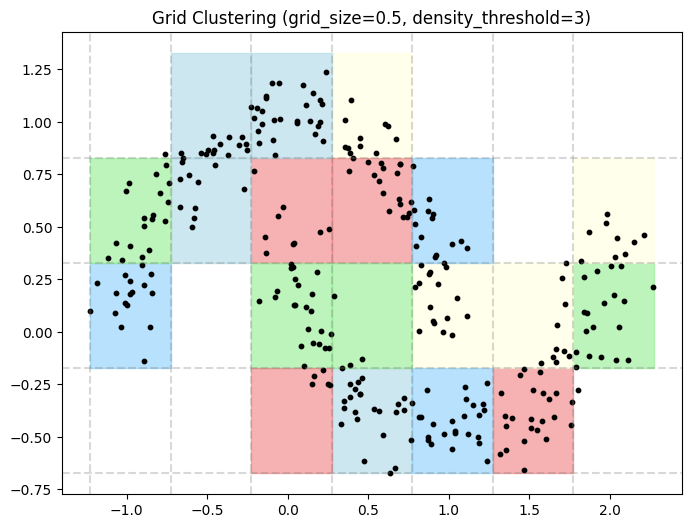

Processing dataset: Half Moons (grid_size=0.5, density_threshold=5)


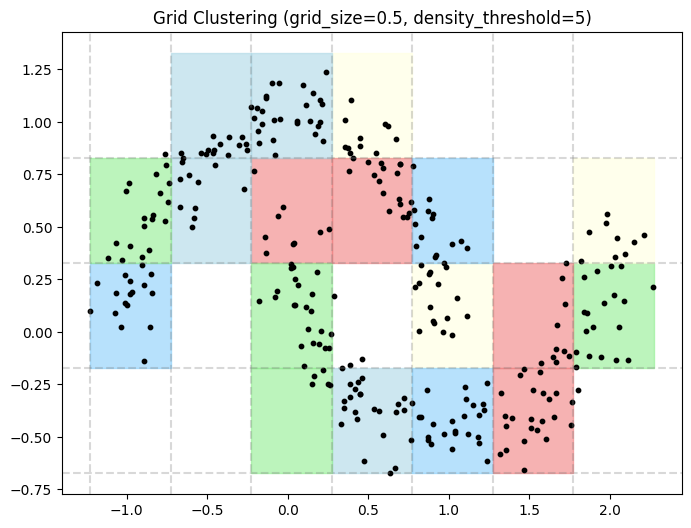

Processing dataset: Half Moons (grid_size=0.5, density_threshold=10)


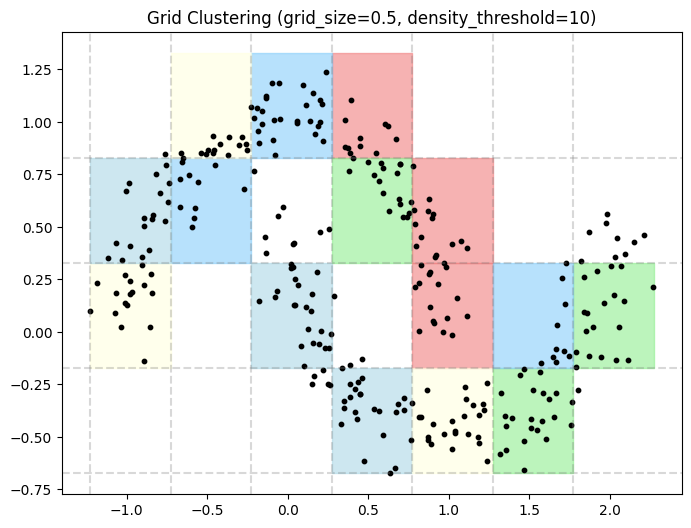

Processing dataset: Blobs (grid_size=0.1, density_threshold=3)


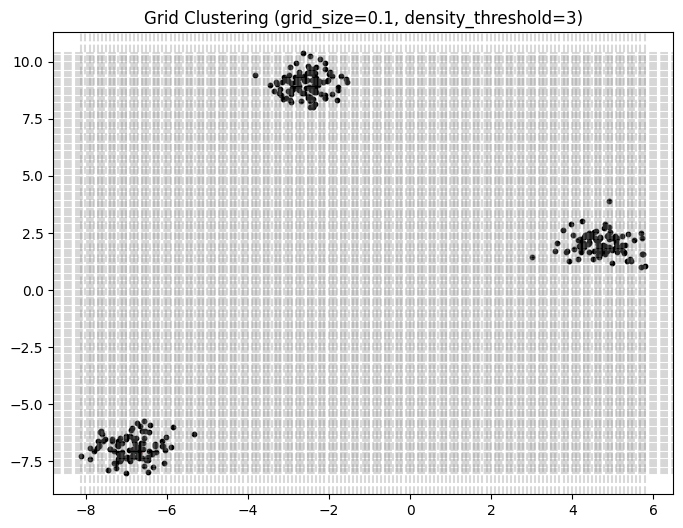

Processing dataset: Blobs (grid_size=0.1, density_threshold=5)


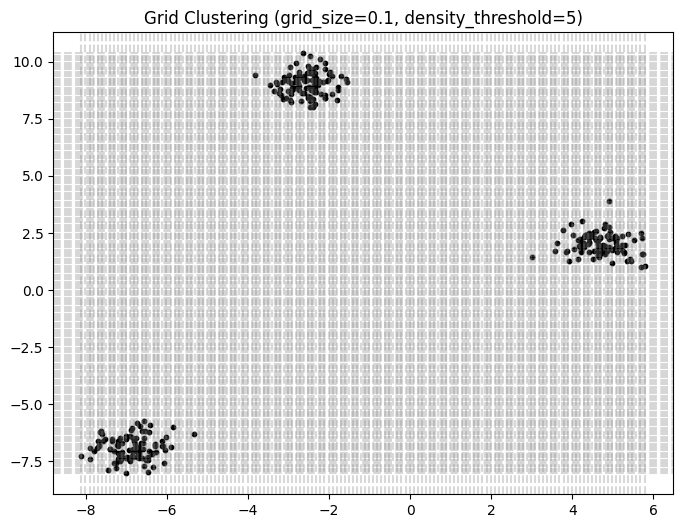

Processing dataset: Blobs (grid_size=0.1, density_threshold=10)


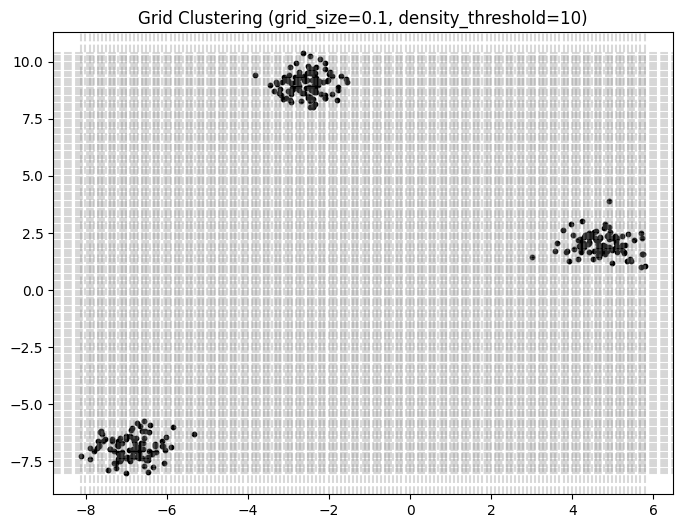

Processing dataset: Blobs (grid_size=0.2, density_threshold=3)


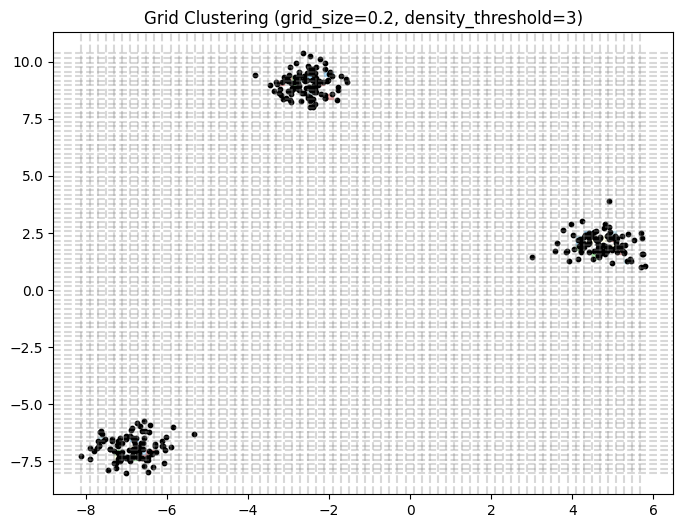

Processing dataset: Blobs (grid_size=0.2, density_threshold=5)


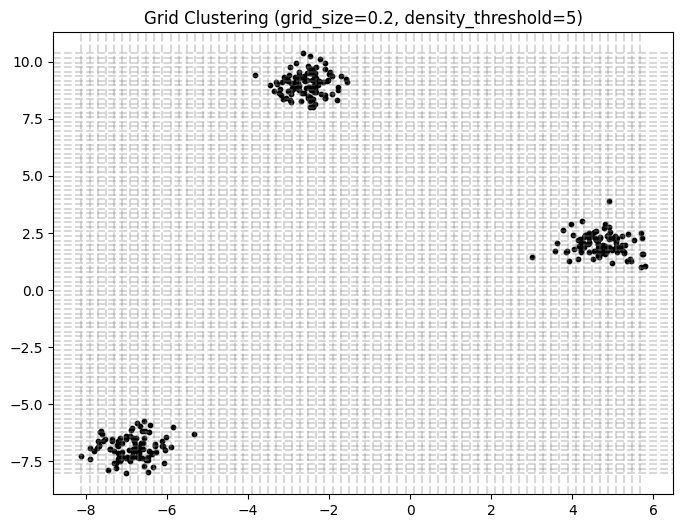

Processing dataset: Blobs (grid_size=0.2, density_threshold=10)


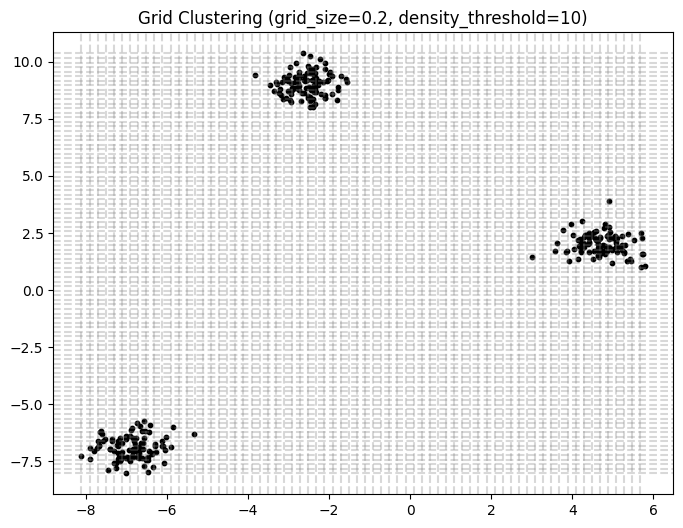

Processing dataset: Blobs (grid_size=0.5, density_threshold=3)


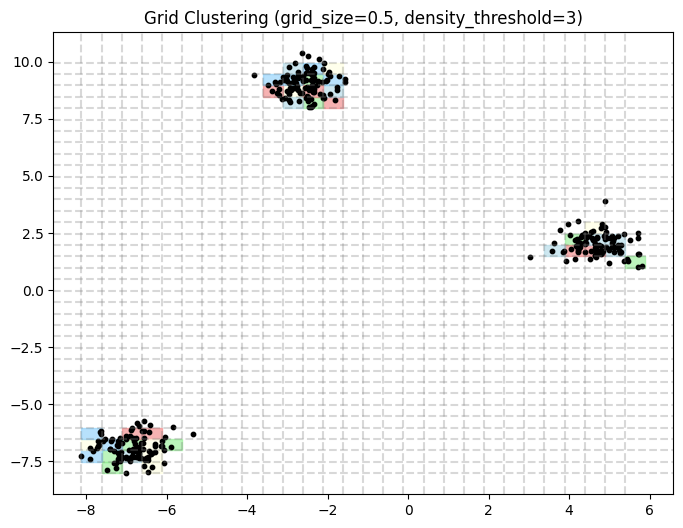

Processing dataset: Blobs (grid_size=0.5, density_threshold=5)


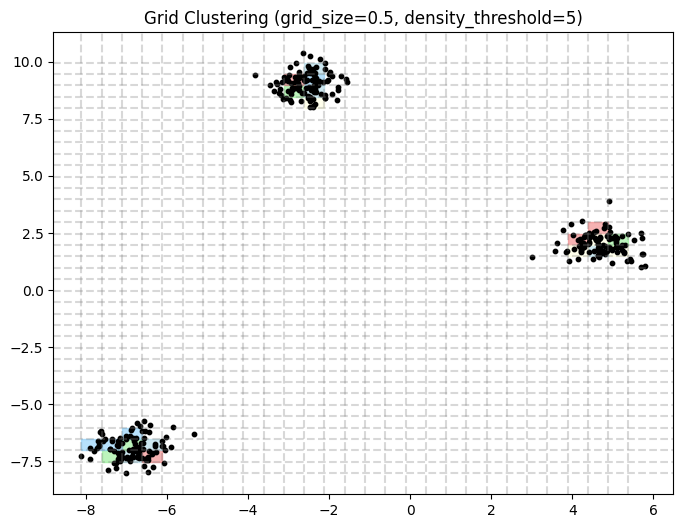

Processing dataset: Blobs (grid_size=0.5, density_threshold=10)


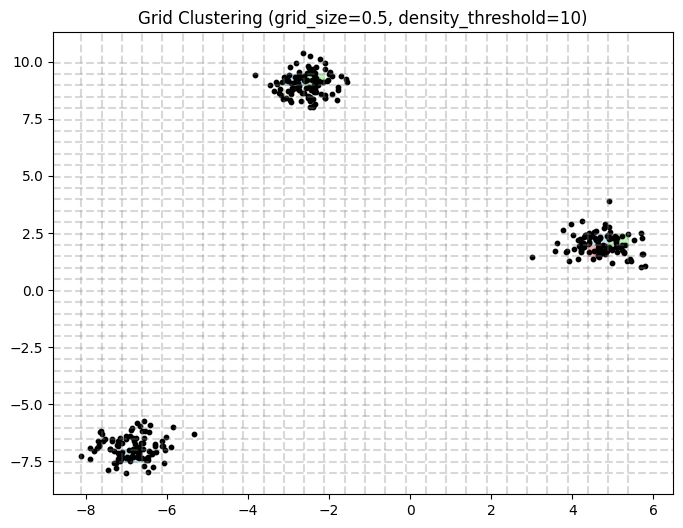

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

class GenericGridClustering:
    def __init__(self, grid_size, density_threshold):
        self.grid_size = grid_size
        self.density_threshold = density_threshold
        self.grid = {}

    def fit(self, X):
        # Определяем границы сетки
        x_min, y_min = X.min(axis=0)
        x_max, y_max = X.max(axis=0)

        # Дискретизируем точки в сетку
        self.grid = {}
        for point in X:
            grid_x = int((point[0] - x_min) / self.grid_size)
            grid_y = int((point[1] - y_min) / self.grid_size)
            self.grid[(grid_x, grid_y)] = self.grid.get((grid_x, grid_y), 0) + 1

        # Определяем кластеры по плотности
        self.clusters = {cell: count for cell, count in self.grid.items() if count >= self.density_threshold}

    def plot_grid(self, X):
        plt.figure(figsize=(8, 6))
        x_min, y_min = X.min(axis=0)
        x_max, y_max = X.max(axis=0)

        # Разные цвета для кластерных областей
        cluster_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightskyblue']

        for i, ((grid_x, grid_y), count) in enumerate(self.clusters.items()):
            color = cluster_colors[i % len(cluster_colors)]  # Циклический выбор цвета
            plt.fill_betweenx(
                [y_min + grid_y * self.grid_size, y_min + (grid_y + 1) * self.grid_size],
                x_min + grid_x * self.grid_size,
                x_min + (grid_x + 1) * self.grid_size,
                color=color, alpha=0.6
            )

        # Отображение сетки
        for i in range(int((x_max - x_min) / self.grid_size) + 1):
            plt.axvline(x=x_min + i * self.grid_size, color='gray', linestyle='--', alpha=0.3)
        for j in range(int((y_max - y_min) / self.grid_size) + 1):
            plt.axhline(y=y_min + j * self.grid_size, color='gray', linestyle='--', alpha=0.3)

        plt.scatter(X[:, 0], X[:, 1], c='black', s=10)
        plt.title(f'Grid Clustering (grid_size={self.grid_size}, density_threshold={self.density_threshold})')
        plt.show()


# Функция для генерации наборов данных
def generate_datasets():
    X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
    X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)
    return [(X_moons, 'Half Moons'), (X_blobs, 'Blobs')]


# Тестирование с разными параметрами
grid_sizes = [0.1, 0.2, 0.5]
density_thresholds = [3, 5, 10]

for X, name in generate_datasets():
    for grid_size in grid_sizes:
        for density_threshold in density_thresholds:
            print(f'Processing dataset: {name} (grid_size={grid_size}, density_threshold={density_threshold})')
            grid_cluster = GenericGridClustering(grid_size=grid_size, density_threshold=density_threshold)
            grid_cluster.fit(X)
            grid_cluster.plot_grid(X)

